# 线性灰度变换
下面代码首先定义了两个函数，然后通过示例展示如何使用函数来进行线性灰度转换。

**get_gray_range函数**用于获取图像的灰度范围，范围下限为图像中每个像素块的最小灰度值，范围上限为每个像素块的最大灰度值。该函数对图像中每个像素块进行遍历，然后取出最大灰度值和最小值灰度值。

**linear_gray_transform函数**用于对图像进行线性灰度变换。遍历图像中的每个像素块，然后对每个像素块的灰度值按照转换公式
$$g(x,y)=\frac{d - c}{b - a}[f(x,y)-a]+c$$
进行线性灰度变换。

其中，

原图像的灰度范围是$[a,b]$，若未传入，则调用get_gray_range函数自动获取。

想要将其拉伸或压缩到新的范围$[c,d]$，如果未传入，则默认为0\~255.

In [24]:
import math  # 导入所需的库

In [25]:
def get_gray_range(image):
    """
    获取图像的灰度范围（最小值和最大值）
    :param image: 二维列表表示的图像，元素为像素灰度值
    :return: 灰度最小值和最大值
    """
    min_gray = 255
    max_gray = 0
    for row in image:
        for pixel in row:
            min_gray = min(min_gray, pixel)
            max_gray = max(max_gray, pixel)
    return min_gray, max_gray


def linear_gray_transform(image, a=None, b=None, c=0, d=255):
    """
    对图像进行线性灰度变换
    :param image: 二维列表表示的图像，元素为像素灰度值
    :param a: 原图像灰度范围的最小值，如果为None则自动获取
    :param b: 原图像灰度范围的最大值，如果为None则自动获取
    :param c: 目标灰度范围的最小值，默认为0
    :param d: 目标灰度范围的最大值，默认为255
    :return: 线性灰度变换后的图像（二维列表形式）
    """
    if a is None or b is None:
        a, b = get_gray_range(image)
    height = len(image)
    width = len(image[0])
    t_image = [[0 for _ in range(width)] for _ in range(height)]
    # 对图像的每个像素进行线性灰度变换
    for y in range(height):
        for x in range(width):
            pixel_value = image[y][x]
            new_value = ((pixel_value - a) / (b - a)) * (d - c) + c
            # 限制灰度值在0 - 255的范围内
            new_value = math.floor(max(0, min(new_value, 255)))
            t_image[y][x] = new_value
    return t_image

# 示例用法

### 对模拟的一个简单3x3的灰度图像进行灰度变换：

In [26]:
image = [
    [10, 20, 30],
    [40, 50, 60],
    [70, 80, 90]
]
transformed_image = linear_gray_transform(image)  # 将图像灰度线性变换到0~255范围内
print(transformed_image)

[[0, 31, 63], [95, 127, 159], [191, 223, 255]]


### 对图像进行线性灰度变换

In [27]:
import cv2

opencv-python库用于读取图像并转换为灰度矩阵，如果没有安装，可以通过命令pip install opencv-python进行安装

In [30]:
# 读取图像（以灰度图模式读取）
image = cv2.imread("flower.jpg", 0)
# 目标灰度范围
c = 200
d = 255
# 进行线性灰度变换
transformed_image = linear_gray_transform(image=image, c=c, d=d)

根据灰度矩阵绘制出灰度图：

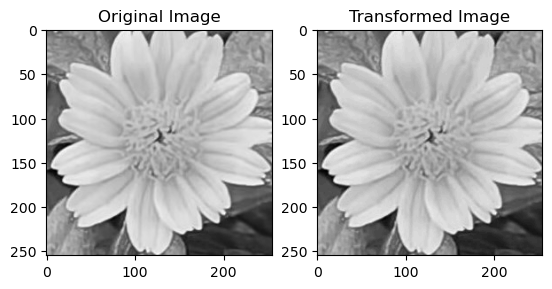

In [31]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')

plt.show()

如果觉得灰度差异不明显，可以更改代码中的c和d参数来调整转换到的灰度范围。可以看到，转换后的图像变暗了。